# Retrieving data for New Delhi District


The first step is to retrieve data like road netowrks, poi's , buildings, parks etc from OSM.

# Network data from OSMnx

In [20]:
import osmnx

PLACE_NAME = "New Delhi, India"
graph = osmnx.graph_from_place(PLACE_NAME)

In [21]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

In [22]:
import geopandas as gpd

In [23]:
Bus_Stops = osmnx.features.features_from_address(PLACE_NAME, {'highway': 'bus_stop'})
len(Bus_Stops)

Bus_Stops_shp = Bus_Stops.to_file(r"C:\Aditya\bus_stop.shp")
type(Bus_Stops)
bus_stops_json= Bus_Stops.to_file(r"C:\Aditya\bus_stop2.geojson")

C:\Users\INAK05404\AppData\Local\Temp\ipykernel_17788\2914715221.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  Bus_Stops_shp = Bus_Stops.to_file(r"C:\Aditya\bus_stop.shp")


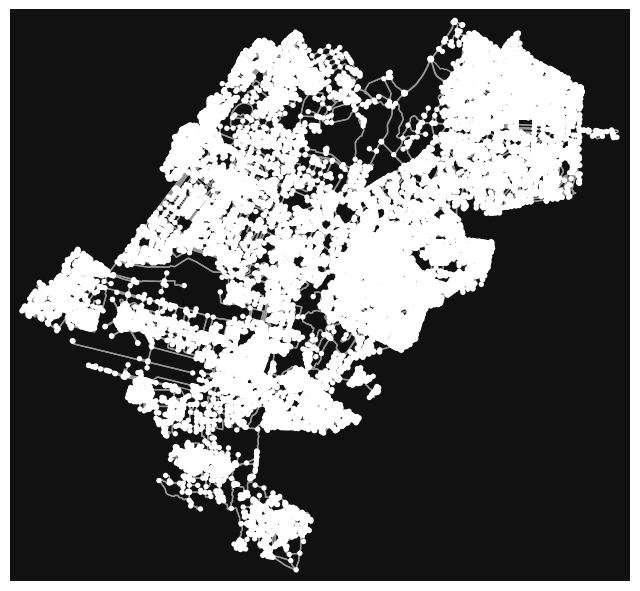

In [24]:
figure, ax = osmnx.plot_graph(graph)

In [25]:
nodes,edges = osmnx.graph_to_gdfs(graph)

In [26]:
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
58049717,28.538417,77.164386,3,NaN,NaN,POINT (77.16439 28.53842)
58049718,28.538984,77.164604,3,NaN,NaN,POINT (77.16460 28.53898)
58049719,28.539359,77.164693,4,NaN,NaN,POINT (77.16469 28.53936)
58049720,28.540456,77.164538,3,NaN,NaN,POINT (77.16454 28.54046)
58049722,28.541519,77.164602,3,NaN,NaN,POINT (77.16460 28.54152)


In [27]:
edges.head()

osmid  highway      access  oneway reversed  \
u        v          key                                                   
58049717 9832172062 0    44676786  service     private   False     True   
         58049718   0     7892285  service  permissive   False    False   
         566995342  0    44676786  service     private   False    False   
58049718 58049719   0     7892285  service  permissive   False    False   
         58049717   0     7892285  service  permissive   False     True   

                         length           name  \
u        v          key                          
58049717 9832172062 0     3.398            NaN   
         58049718   0    66.582  JNU Ring Road   
         566995342  0    56.181            NaN   
58049718 58049719   0    42.568  JNU Ring Road   
         58049717   0    66.582  JNU Ring Road   

                                                                  geometry  \
u        v          key                                                      
58049717 9832172062 0    LINESTRING (77.16439 28.53842, 77.16441 28.53840)   
         58049718   0    LINESTRING (77.16439 28.53842, 77.16449 28.538...   
         566995342  0    LINESTRING (77.16439 28.53842, 77.16436 28.538...   
58049718 58049719   0    LINESTRING (77.16460 28.53898, 77.16468 28.539...   
         58049717   0    LINESTRING (77.16460 28.53898, 77.16449 28.538...   

                        bridge lanes  ref junction width maxspeed service  \
u        v          key                                                     
58049717 9832172062 0      NaN   NaN  NaN      NaN   NaN      NaN     NaN   
         58049718   0      NaN   NaN  NaN      NaN   NaN      NaN     NaN   
         566995342  0      NaN   NaN  NaN      NaN   NaN      NaN     NaN   
58049718 58049719   0      NaN   NaN  NaN      NaN   NaN      NaN     NaN   
         58049717   0      NaN   NaN  NaN      NaN   NaN      NaN     NaN   

                        tunnel area  
u        v          key              
58049717 9832172062 0      NaN  NaN  
         58049718   0      NaN  NaN  
         566995342  0      NaN  NaN  
58049718 58049719   0      NaN  NaN  
         58049717   0      NaN  NaN

In [28]:
area = osmnx.geocode_to_gdf(PLACE_NAME)

In [29]:
type(area)

geopandas.geodataframe.GeoDataFrame

In [30]:
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((77.05037 28.55871, 77.05275 28.55734...",28.645684,28.481221,77.255139,77.050371,242203928,relation,2763541,28.613895,77.209006,boundary,administrative,10,0.674804,city,New Delhi,"New Delhi, Delhi, India"


<AxesSubplot: >

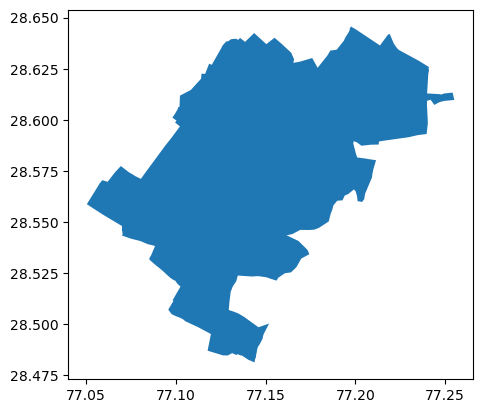

In [31]:
area.plot()

In [32]:
type(area)

geopandas.geodataframe.GeoDataFrame

# Building data from OSMnx

In [33]:
buildings= osmnx.geometries_from_place(PLACE_NAME, {"building": True})

C:\Users\INAK05404\AppData\Local\Temp\ipykernel_17788\2841212630.py:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  buildings= osmnx.geometries_from_place(PLACE_NAME, {"building": True})


In [34]:
buildings

building  \
element_type osmid                    
node         438049077       office   
             621886290          yes   
             943245922          yes   
             1854126933         yes   
             1870814931         yes   
...                             ...   
relation     16792966    commercial   
             17080654           yes   
             17177766           yes   
             17233578    commercial   
             17583542           yes   

                                                                      name  \
element_type osmid                                                           
node         438049077   CRIS Office - Centre for Railways Information ...   
             621886290                                      Shamsher Singh   
             943245922                                         Le Méridien   
             1854126933                    School of International studies   
             1870814931                                       Kerala House   
...                                                                    ...   
relation     16792966                                                  NaN   
             17080654                                      National Museum   
             17177766                                                  NaN   
             17233578                                                  NaN   
             17583542                                                  NaN   

                                                                  geometry  \
element_type osmid                                                           
node         438049077                           POINT (77.18510 28.58367)   
             621886290                           POINT (77.15142 28.53429)   
             943245922                           POINT (77.21838 28.61869)   
             1854126933                          POINT (77.16894 28.53901)   
             1870814931                          POINT (77.21635 28.62322)   
...                                                                    ...   
relation     16792966    POLYGON ((77.22118 28.63210, 77.22129 28.63233...   
             17080654    MULTIPOLYGON (((77.21869 28.61194, 77.21873 28...   
             17177766    POLYGON ((77.23971 28.62378, 77.23973 28.62386...   
             17233578    POLYGON ((77.21998 28.63452, 77.22003 28.63451...   
             17583542    POLYGON ((77.21054 28.61736, 77.21080 28.61721...   

                        tourism stars addr:housename addr:postcode amenity  \
element_type osmid                                                           
node         438049077      NaN   NaN            NaN           NaN     NaN   
             621886290      NaN   NaN            NaN           NaN     NaN   
             943245922    hotel     5            NaN           NaN     NaN   
             1854126933     NaN   NaN            SIS        110067     NaN   
             1870814931     NaN   NaN            NaN           NaN     NaN   
...                         ...   ...            ...           ...     ...   
relation     16792966       NaN   NaN            NaN           NaN     NaN   
             17080654    museum   NaN            NaN           NaN     NaN   
             17177766       NaN   NaN            NaN           NaN     NaN   
             17233578       NaN   NaN            NaN           NaN     NaN   
             17583542       NaN   NaN            NaN           NaN     NaN   

                        barrier addr:housenumber  ... name:pl rooms name:fa  \
element_type osmid                                ...                         
node         438049077      NaN              NaN  ...     NaN   NaN     NaN   
             621886290      NaN              NaN  ...     NaN   NaN     NaN   
             943245922      NaN              NaN  ...     NaN   NaN     NaN   
             1854126933     NaN              NaN  ...     NaN   NaN     NaN   


In [35]:
type(buildings)

geopandas.geodataframe.GeoDataFrame

In [36]:
len(buildings)

23610

Building Count: 23610

In [37]:
buildings.head(11)

building  \
element_type osmid                    
node         438049077       office   
             621886290          yes   
             943245922          yes   
             1854126933         yes   
             1870814931         yes   
             2421839490       house   
             2955430019  apartments   
             3424241068  greenhouse   
             3476067323  commercial   
             3603184194       house   
             5137961093         yes   

                                                                      name  \
element_type osmid                                                           
node         438049077   CRIS Office - Centre for Railways Information ...   
             621886290                                      Shamsher Singh   
             943245922                                         Le Méridien   
             1854126933                    School of International studies   
             1870814931                                       Kerala House   
             2421839490                                     Pragati Bhavan   
             2955430019                                                NaN   
             3424241068                                                NaN   
             3476067323                        Newspaper and Magazine Shop   
             3603184194                                      C/O Barthakur   
             5137961093                         International Youth Center   

                                          geometry tourism stars  \
element_type osmid                                                 
node         438049077   POINT (77.18510 28.58367)     NaN   NaN   
             621886290   POINT (77.15142 28.53429)     NaN   NaN   
             943245922   POINT (77.21838 28.61869)   hotel     5   
             1854126933  POINT (77.16894 28.53901)     NaN   NaN   
             1870814931  POINT (77.21635 28.62322)     NaN   NaN   
             2421839490  POINT (77.18763 28.56638)     NaN   NaN   
             2955430019  POINT (77.20278 28.56725)     NaN   NaN   
             3424241068  POINT (77.23754 28.60463)     NaN   NaN   
             3476067323  POINT (77.16822 28.54932)     NaN   NaN   
             3603184194  POINT (77.20219 28.56029)     NaN   NaN   
             5137961093  POINT (77.19553 28.60350)     NaN   NaN   

                        addr:housename addr:postcode amenity barrier  \
element_type osmid                                                     
node         438049077             NaN           NaN     NaN     NaN   
             621886290             NaN           NaN     NaN     NaN   
             943245922             NaN           NaN     NaN     NaN   
             1854126933            SIS        110067     NaN     NaN   
             1870814931            NaN           NaN     NaN     NaN   
             2421839490            NaN           NaN     NaN     NaN   
             2955430019            NaN           NaN     NaN     NaN   
             3424241068            NaN           NaN     NaN     NaN   
             3476067323            NaN        110067     NaN     NaN   
             3603184194            NaN           NaN     NaN     NaN   
             5137961093            NaN           NaN     NaN     NaN   

                                    addr:housenumber  ... name:pl rooms  \
element_type osmid                                    ...                 
node         438049077                           NaN  ...     NaN   NaN   
             621886290                           NaN  ...     NaN   NaN   
             943245922                           NaN  ...     NaN   NaN   
             1854126933                          NaN  ...     NaN   NaN   
             1870814931                          NaN  ...     NaN   NaN   
             2421839490                          NaN  ...     NaN   NaN   
             2955430019                          NaN  ...     NaN   NaN   
       

In [38]:
buildings.columns

Index(['building', 'name', 'geometry', 'tourism', 'stars', 'addr:housename',
       'addr:postcode', 'amenity', 'barrier', 'addr:housenumber',
       ...
       'name:pl', 'rooms', 'name:fa', 'name:pnb', 'name:ro', 'int_name',
       'name:ckb', 'old_name', 'name:cs', 'name:hy'],
      dtype='object', length=202)

# POI 

In [39]:
resturants = osmnx.geometries_from_place(PLACE_NAME,{"amenity" : "restaurant"}
)

C:\Users\INAK05404\AppData\Local\Temp\ipykernel_17788\546141205.py:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  resturants = osmnx.geometries_from_place(PLACE_NAME,{"amenity" : "restaurant"}


In [40]:
len(resturants)

200

In [41]:
resturants.columns

Index(['amenity', 'created_by', 'geometry', 'diet:vegan', 'diet:vegetarian',
       'disused', 'name', 'cmt', 'description', 'ele', 'source', 'sym',
       'addr:city', 'cuisine', 'phone', 'tables', 'addr:housenumber',
       'addr:street', 'name:ru', 'opening_hours', 'brand', 'brand:wikidata',
       'brand:wikipedia', 'contact:phone', 'wheelchair', 'addr:housename',
       'addr:postcode', 'addr:suburb', 'diet:lacto_vegetarian', 'level',
       'operator', 'outdoor_seating', 'start_date', 'air_conditioning',
       'delivery', 'takeaway', 'capacity', 'addr:place', 'indoor_seating',
       'smoking', 'internet_access', 'survey:date', 'name:ca', 'name:es',
       'website', 'name:fa', 'addr:unit', 'name:en', 'name:de', 'name:hi',
       'check_date', 'access', 'name:ja', 'addr:block', 'name:fr', 'alcohol',
       'drink:beer', 'drink:vodka', 'drink:wine', 'tourism',
       'check_date:opening_hours', 'toilets', 'contact:email',
       'contact:facebook', 'contact:instagram', 'contact:w

<AxesSubplot: >

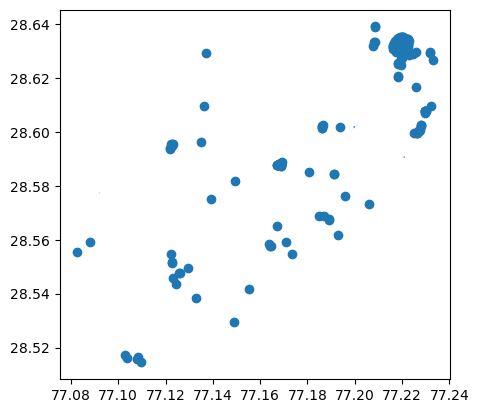

In [42]:
resturants.plot()

In [43]:
resturants.columns.values

array(['amenity', 'created_by', 'geometry', 'diet:vegan',
       'diet:vegetarian', 'disused', 'name', 'cmt', 'description', 'ele',
       'source', 'sym', 'addr:city', 'cuisine', 'phone', 'tables',
       'addr:housenumber', 'addr:street', 'name:ru', 'opening_hours',
       'brand', 'brand:wikidata', 'brand:wikipedia', 'contact:phone',
       'wheelchair', 'addr:housename', 'addr:postcode', 'addr:suburb',
       'diet:lacto_vegetarian', 'level', 'operator', 'outdoor_seating',
       'start_date', 'air_conditioning', 'delivery', 'takeaway',
       'capacity', 'addr:place', 'indoor_seating', 'smoking',
       'internet_access', 'survey:date', 'name:ca', 'name:es', 'website',
       'name:fa', 'addr:unit', 'name:en', 'name:de', 'name:hi',
       'check_date', 'access', 'name:ja', 'addr:block', 'name:fr',
       'alcohol', 'drink:beer', 'drink:vodka', 'drink:wine', 'tourism',
       'check_date:opening_hours', 'toilets', 'contact:email',
       'contact:facebook', 'contact:instagram', 'co

In [44]:
interesting_columns = [
    "name",
    "opening_hours",
    'addr:city',
    'addr:housename',
    'addr:postcode',
    'delivery',
    'takeaway'
]

resturants[interesting_columns].head(20)

name  \
element_type osmid                               
node         308894803                     NaN   
             928567979              Piccadelhi   
             947951039          Museum Canteen   
             1241932078           Bangla Foods   
             1556466158            Spice Route   
             1556467803             Good Earth   
             1563325267          Nathus Sweets   
             1563325307    Bengali Sweet House   
             1582385446                    NaN   
             1966254717  Andhra Bhawan Canteen   
             2327524028                Berco's   
             2429556253              Pizza Hut   
             2591114289    Indian Coffee House   
             2592537223            Hira Sweets   
             2709534496      Keshav Restaurant   
             3704734413                Nando's   
             3883052658          Nagaland Cafe   
             4069815728          The Colonnade   
             4069858894                   Gola   
             4114512206             Fat Lulu's   

                                                       opening_hours  \
element_type osmid                                                     
node         308894803                                           NaN   
             928567979                                           NaN   
             947951039                                           NaN   
             1241932078                                          NaN   
             1556466158                                          NaN   
             1556467803                                          NaN   
             1563325267                                          NaN   
             1563325307                                          NaN   
             1582385446                                          NaN   
             1966254717  Mo-Su 08:00-22:00, 00:00-15:00, 07:30-22:00   
             2327524028                                          NaN   
             2429556253                                          NaN   
             2591114289                                          NaN   
             2592537223                            Mo-Su 08:00-23:00   
             2709534496                            Mo-Su 10:00-18:00   
             3704734413                            Mo-Su 11:30-00:30   
             3883052658                                          NaN   
             4069815728                                          NaN   
             4069858894                                          NaN   
             4114512206                                          NaN   

                         addr:city     addr:housename addr:postcode delivery  \
element_type osmid                                                             
node         308894803         NaN                NaN           NaN      NaN   
             928567979         NaN                NaN           NaN      NaN   
             947951039         NaN                NaN           NaN      NaN   
             1241932078        NaN                NaN           NaN      NaN   
             1556466158  New Delhi                NaN           NaN      NaN   
             1556467803        NaN                NaN           NaN      NaN   
             1563325267        NaN                NaN           NaN      NaN   
             1563325307        NaN                NaN           NaN      NaN   
             1582385446        NaN                NaN           NaN      NaN   
             1966254717        NaN                NaN           NaN      NaN   
             2327524028  New Delhi                NaN           NaN      NaN   
             2429556253        NaN                NaN           NaN      NaN   
             2591114289  New Delhi  Mohan Singh Place        110001      NaN   
             2592537223        NaN                NaN        110001      yes   
             2709534496  New Delhi                NaN        110001      NaN

# Parks and green areas

In [75]:
parks = osmnx.geometries_from_place(PLACE_NAME, {'leisure': 'park','landuse': 'grass'}
)

C:\Users\INAK05404\AppData\Local\Temp\ipykernel_17788\3282003023.py:1: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  parks = osmnx.geometries_from_place(PLACE_NAME, {'leisure': 'park','landuse': 'grass'}


In [76]:
parks.head()

barrier  \
element_type osmid                 
node         7668740721      NaN   
             11687895257     NaN   
way          38170389       wall   
             42340191        NaN   
             42340193        NaN   

                                                                   geometry  \
element_type osmid                                                            
node         7668740721                           POINT (77.21106 28.63425)   
             11687895257                          POINT (77.16508 28.57082)   
way          38170389     POLYGON ((77.14496 28.53215, 77.14470 28.53232...   
             42340191     POLYGON ((77.17572 28.55407, 77.17606 28.55375...   
             42340193     POLYGON ((77.17492 28.55335, 77.17535 28.55293...   

                         access entrance leisure wikimedia_commons  \
element_type osmid                                                   
node         7668740721     NaN      NaN    park               NaN   
             11687895257    NaN      NaN    park               NaN   
way          38170389       NaN      NaN    park               NaN   
             42340191       NaN      NaN    park               NaN   
             42340193       NaN      NaN    park               NaN   

                                                name  \
element_type osmid                                     
node         7668740721                          NaN   
             11687895257             BADMINTON COURT   
way          38170389                  Vasant Vatika   
             42340191         B Block Community Park   
             42340193     BC-BD Block Community Park   

                                                                      nodes  \
element_type osmid                                                            
node         7668740721                                                 NaN   
             11687895257                                                NaN   
way          38170389     [449453525, 5291753409, 5291753408, 2008921256...   
             42340191     [528541683, 528541685, 528541687, 528541689, 5...   
             42340193     [528541704, 528541699, 528541700, 528541705, 5...   

                         landuse layer  ... addr:neighbourhood natural  \
element_type osmid                      ...                              
node         7668740721      NaN   NaN  ...                NaN     NaN   
             11687895257     NaN   NaN  ...                NaN     NaN   
way          38170389        NaN   NaN  ...                NaN     NaN   
             42340191        NaN   NaN  ...                NaN     NaN   
             42340193        NaN   NaN  ...                NaN     NaN   

                         name:fa name:fr operator:type  dog sport  \
element_type osmid                                                  
node         7668740721      NaN     NaN           NaN  NaN   NaN   
             11687895257     NaN     NaN           NaN  NaN   NaN   
way          38170389        NaN     NaN           NaN  NaN   NaN   
             42340191        NaN     NaN           NaN  NaN   NaN   
             42340193        NaN     NaN           NaN  NaN   NaN   

                         traffic_calming ways type  
element_type osmid                                  
node         7668740721              NaN  NaN  NaN  
             11687895257             NaN  NaN  NaN  
way          38170389                NaN  NaN  NaN  
             42340191                NaN  NaN  NaN  
             42340193                NaN  NaN  NaN  

[5 rows x 49 columns]

In [47]:
len(parks)

672

In [77]:
type(parks)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot: >

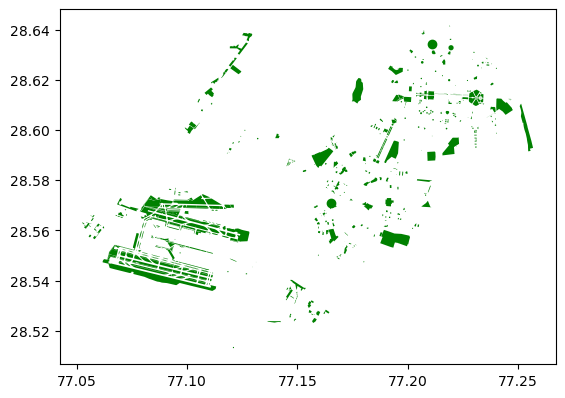

In [49]:
parks.plot(color= "green")

# Plotting the Map

<AxesSubplot: >

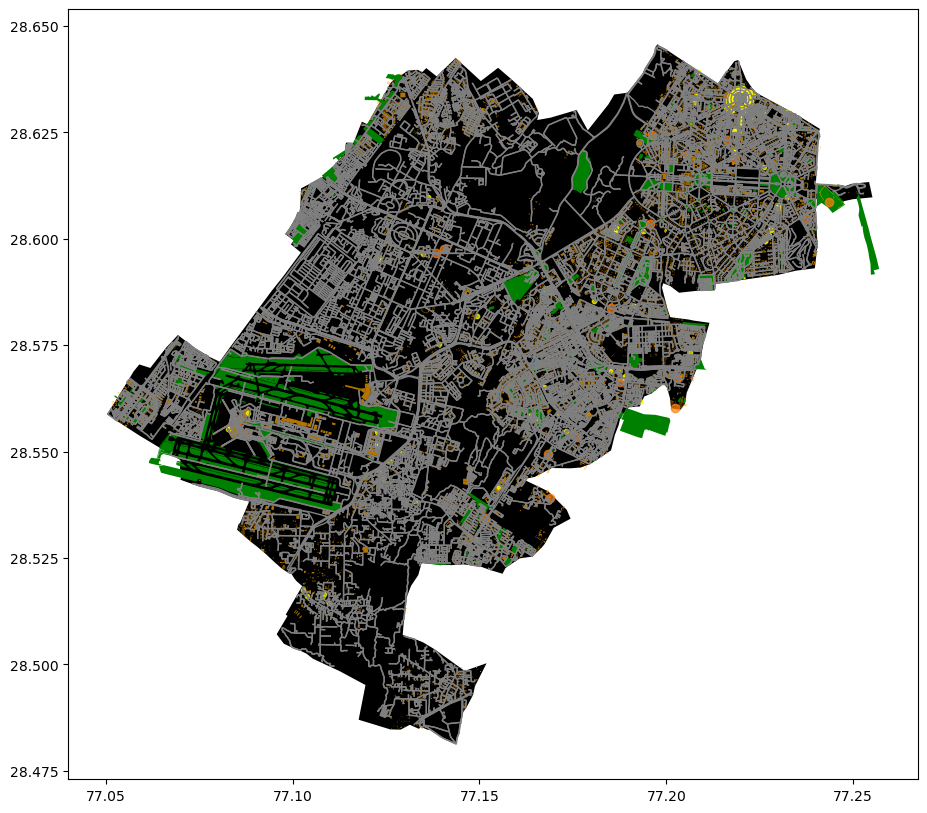

In [50]:
import matplotlib
figure, ax = matplotlib.pyplot.subplots(figsize=(15,10))

# Plot the footprint
area.plot(ax=ax, facecolor="black")

# Plot parks
parks.plot(ax=ax, facecolor="green")

# Plot street ‘edges’
edges.plot(ax=ax, linewidth=1, edgecolor="grey")

# Plot buildings
buildings.plot(ax=ax, facecolor="orange", alpha=0.7)

# Plot restaurants
resturants.plot(ax=ax, color="yellow", alpha=0.7, markersize=10)

In [51]:
nodes, edges = osmnx.graph_to_gdfs(graph)

In [52]:
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
58049717,28.538417,77.164386,3,NaN,NaN,POINT (77.16439 28.53842)
58049718,28.538984,77.164604,3,NaN,NaN,POINT (77.16460 28.53898)
58049719,28.539359,77.164693,4,NaN,NaN,POINT (77.16469 28.53936)
58049720,28.540456,77.164538,3,NaN,NaN,POINT (77.16454 28.54046)
58049722,28.541519,77.164602,3,NaN,NaN,POINT (77.16460 28.54152)


In [53]:
edges.head()

osmid  highway      access  oneway reversed  \
u        v          key                                                   
58049717 9832172062 0    44676786  service     private   False     True   
         58049718   0     7892285  service  permissive   False    False   
         566995342  0    44676786  service     private   False    False   
58049718 58049719   0     7892285  service  permissive   False    False   
         58049717   0     7892285  service  permissive   False     True   

                         length           name  \
u        v          key                          
58049717 9832172062 0     3.398            NaN   
         58049718   0    66.582  JNU Ring Road   
         566995342  0    56.181            NaN   
58049718 58049719   0    42.568  JNU Ring Road   
         58049717   0    66.582  JNU Ring Road   

                                                                  geometry  \
u        v          key                                                      
58049717 9832172062 0    LINESTRING (77.16439 28.53842, 77.16441 28.53840)   
         58049718   0    LINESTRING (77.16439 28.53842, 77.16449 28.538...   
         566995342  0    LINESTRING (77.16439 28.53842, 77.16436 28.538...   
58049718 58049719   0    LINESTRING (77.16460 28.53898, 77.16468 28.539...   
         58049717   0    LINESTRING (77.16460 28.53898, 77.16449 28.538...   

                        bridge lanes  ref junction width maxspeed service  \
u        v          key                                                     
58049717 9832172062 0      NaN   NaN  NaN      NaN   NaN      NaN     NaN   
         58049718   0      NaN   NaN  NaN      NaN   NaN      NaN     NaN   
         566995342  0      NaN   NaN  NaN      NaN   NaN      NaN     NaN   
58049718 58049719   0      NaN   NaN  NaN      NaN   NaN      NaN     NaN   
         58049717   0      NaN   NaN  NaN      NaN   NaN      NaN     NaN   

                        tunnel area  
u        v          key              
58049717 9832172062 0      NaN  NaN  
         58049718   0      NaN  NaN  
         566995342  0      NaN  NaN  
58049718 58049719   0      NaN  NaN  
         58049717   0      NaN  NaN

In [54]:
type(parks)

geopandas.geodataframe.GeoDataFrame

In [78]:
import geopandas as gpd

In [56]:
parks = parks.astype(str)

In [57]:
fp = r"C:\Aditya\nodes.shp"
osmnx.io.save_graph_shapefile(fp)

C:\Users\INAK05404\AppData\Local\Temp\ipykernel_17788\3372878402.py:2: FutureWarning: The `save_graph_shapefile` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  osmnx.io.save_graph_shapefile(fp)


AttributeError: 'str' object has no attribute 'copy'

In [ ]:
osmnx.save_graph_geopackage(graph, filepath = r"C:\Aditya\edges.gpkg")

# Spatial Analysis of the results

In [79]:
parks.describe()

,barrier,geometry,access,entrance,leisure,wikimedia_commons,name,nodes,landuse,layer,...,addr:neighbourhood,natural,name:fa,name:fr,operator:type,dog,sport,traffic_calming,ways,type
count,43,672,4,1,365,4,82,670,350,2,...,1,1,2,1,3,1,1,1,67,67
unique,2,671,2,1,3,4,81,670,1,2,...,1,1,2,1,2,1,1,1,67,1
top,wall,"POLYGON ((77.2249797 28.6130239, 77.2249421 28...",yes,gate,park,"Category:National Police Memorial, New Delhi",Children's Park,"[449453525, 5291753409, 5291753408, 2008921256...",grass,-1,...,Basant Nagar,grassland,پارک کودکان,Parc pour enfants,public,leashed,multi,island,"[370280689, 370280691]",multipolygon
freq,38,2,3,1,349,1,2,1,350,1,...,1,1,1,1,2,1,1,1,1,67


In [72]:
parks.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 672 entries, ('node', 7668740721) to ('relation', 15993303)
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   barrier                  672 non-null    object
 1   geometry                 672 non-null    object
 2   access                   672 non-null    object
 3   entrance                 672 non-null    object
 4   leisure                  672 non-null    object
 5   wikimedia_commons        672 non-null    object
 6   name                     672 non-null    object
 7   nodes                    672 non-null    object
 8   landuse                  672 non-null    object
 9   layer                    672 non-null    object
 10  wikidata                 672 non-null    object
 11  wikipedia                672 non-null    object
 12  name:hi                  672 non-null    object
 13  name:zh                  672 non-null    object
 14  old_

In [73]:
buildings.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [59]:
type(parks)

pandas.core.frame.DataFrame

In [80]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [81]:
parks_projected = parks.to_crs(epsg = 32643)
parks_projected.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Comapring coordinate values to see changed CRS

In [82]:


projected_geom = parks_projected.iloc[3]["geometry"]
orig_geom = parks.iloc[3]["geometry"]

print(orig_geom)
print(projected_geom)

POLYGON ((77.1757227 28.5540722, 77.1760595 28.5537545, 77.175818 28.553513, 77.1754716 28.5538372, 77.1757227 28.5540722))
POLYGON ((712846.3426009379 3160514.5436795624, 712879.9391954701 3160479.9322195253, 712856.7935356467 3160452.7381208674, 712822.2444677572 3160488.0529701114, 712846.3426009379 3160514.5436795624))


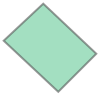

In [83]:
orig_geom

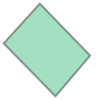

In [84]:
projected_geom

In [85]:
parks_projected.area

element_type  osmid      
node          7668740721         0.000000
              11687895257        0.000000
way           38170389       42349.131738
              42340191        1740.492723
              42340193         760.518183
                                 ...     
relation      15993136        6445.130797
              15993258        5344.034788
              15993282        7542.190809
              15993296       10568.122452
              15993303        4692.614185
Length: 672, dtype: float64

In [86]:
parks_projected["Area"]= parks_projected.area
parks_projected["Area"].describe()

count       672.000000
mean      18249.592511
std       60273.000989
min           0.000000
25%        1212.722621
50%        3390.759758
75%       12339.038284
max      974202.242319
Name: Area, dtype: float64

In [87]:
projected_geom.area

1740.4927229447712

In [88]:
parks_projected["Area_sqm"] = parks_projected.geometry.area

In [89]:
parks_projected.head(12)

barrier  \
element_type osmid                 
node         7668740721      NaN   
             11687895257     NaN   
way          38170389       wall   
             42340191        NaN   
             42340193        NaN   
             42340196        NaN   
             44186065        NaN   
             44186067        NaN   
             44186069        NaN   
             44315445        NaN   
             44352051        NaN   
             58719250        NaN   

                                                                   geometry  \
element_type osmid                                                            
node         7668740721                      POINT (716139.669 3169463.598)   
             11687895257                     POINT (711771.387 3162351.817)   
way          38170389     POLYGON ((709879.662 3158030.985, 709854.152 3...   
             42340191     POLYGON ((712846.343 3160514.544, 712879.939 3...   
             42340193     POLYGON ((712769.135 3160433.375, 712812.372 3...   
             42340196     POLYGON ((712895.049 3160558.311, 712938.285 3...   
             44186065     POLYGON ((716272.332 3167181.160, 716274.319 3...   
             44186067     POLYGON ((715941.699 3167169.305, 715939.800 3...   
             44186069     POLYGON ((715838.986 3167240.759, 715845.631 3...   
             44315445     POLYGON ((715797.324 3162279.577, 716001.942 3...   
             44352051     POLYGON ((714442.622 3165947.659, 714449.255 3...   
             58719250     POLYGON ((717825.034 3167126.966, 717828.825 3...   

                         access entrance leisure  \
element_type osmid                                 
node         7668740721     NaN      NaN    park   
             11687895257    NaN      NaN    park   
way          38170389       NaN      NaN    park   
             42340191       NaN      NaN    park   
             42340193       NaN      NaN    park   
             42340196       NaN      NaN    park   
             44186065       NaN      NaN    park   
             44186067       NaN      NaN    park   
             44186069       NaN      NaN    park   
             44315445       NaN      NaN    park   
             44352051       NaN      NaN    park   
             58719250       NaN      NaN    park   

                                                     wikimedia_commons  \
element_type osmid                                                       
node         7668740721                                            NaN   
             11687895257                                           NaN   
way          38170389                                              NaN   
             42340191                                              NaN   
             42340193                                              NaN   
             42340196                                              NaN   
             44186065                                              NaN   
             44186067                                              NaN   
             44186069                                              NaN   
             44315445                                              NaN   
             44352051     Category:National Police Memorial, New Delhi   
             58719250                                              NaN   

                                                      name  \
element_type osmid                                           
node         7668740721                                NaN   
             11687895257                   BADMINTON COURT   
way          38170389                        Vasant Vatika   
             42340191               B Block Community Park   
             42340193           BC-BD Block Community Park   
             42340196           BA-BB Block Community Park   
             44186065                                  NaN   
             44186067                                  NaN   
             44186069      

In [90]:
p_geom= parks_projected.iloc[3]["Area_sqm"]

In [91]:
p_geom

1740.4927229447712

In [92]:
parks_projected.area

element_type  osmid      
node          7668740721         0.000000
              11687895257        0.000000
way           38170389       42349.131738
              42340191        1740.492723
              42340193         760.518183
                                 ...     
relation      15993136        6445.130797
              15993258        5344.034788
              15993282        7542.190809
              15993296       10568.122452
              15993303        4692.614185
Length: 672, dtype: float64

In [98]:
Total_Area = parks_projected["Area"].sum()

In [99]:
Total_Area

12263726.167467827

In [95]:
area.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [96]:
area_proj = area.to_crs(epsg = 32643)
area_proj

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((700571.694 3160811.675, 700807.082 3...",28.645684,28.481221,77.255139,77.050371,242203928,relation,2763541,28.613895,77.209006,boundary,administrative,10,0.674804,city,New Delhi,"New Delhi, Delhi, India"


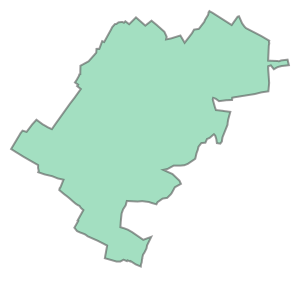

In [97]:
area_geom = area_proj.iloc[0]['geometry']
area_geom

In [100]:
area_proj["Accessibility"] = "High"

In [101]:
area_proj.head()

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name,Accessibility
0,"POLYGON ((700571.694 3160811.675, 700807.082 3...",28.645684,28.481221,77.255139,77.050371,242203928,relation,2763541,28.613895,77.209006,boundary,administrative,10,0.674804,city,New Delhi,"New Delhi, Delhi, India",High


In [102]:
area_proj["Area_sqm"] = area_proj.geometry.area
area_proj.head(12)

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name,Accessibility,Area_sqm
0,"POLYGON ((700571.694 3160811.675, 700807.082 3...",28.645684,28.481221,77.255139,77.050371,242203928,relation,2763541,28.613895,77.209006,boundary,administrative,10,0.674804,city,New Delhi,"New Delhi, Delhi, India",High,1.613852e+08


In [103]:
area_proj.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [104]:
Total_Area_ND = area_proj.geometry.area
Total_Area_ND

0    1.613852e+08
dtype: float64

In [105]:
TND=area_geom.area
TND

161385205.94867057

# Calculated Greenary in Study Area

In [106]:
Percentage_Greenary = (Total_Area/TND)*100
Percentage_Greenary

7.599039884342542

# Result: The Green Area is about 7 % in the New Delhi District

# Calculating the areas and number of buildings in the study area

In [60]:
buildings.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [61]:
building_proj = buildings.to_crs(epsg= 32643)
building_proj.crs

<Projected CRS: EPSG:32643>
Name: WGS 84 / UTM zone 43N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 72°E and 78°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Maldives. Pakistan. Russian Federation. Tajikistan.
- bounds: (72.0, 0.0, 78.0, 84.0)
Coordinate Operation:
- name: UTM zone 43N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [62]:
building_proj.head()

building  \
element_type osmid                 
node         438049077    office   
             621886290       yes   
             943245922       yes   
             1854126933      yes   
             1870814931      yes   

                                                                      name  \
element_type osmid                                                           
node         438049077   CRIS Office - Centre for Railways Information ...   
             621886290                                      Shamsher Singh   
             943245922                                         Le Méridien   
             1854126933                    School of International studies   
             1870814931                                       Kerala House   

                                               geometry tourism stars  \
element_type osmid                                                      
node         438049077   POINT (713703.985 3163811.529)     NaN   NaN   
             621886290   POINT (710507.784 3158278.885)     NaN   NaN   
             943245922   POINT (716888.172 3167752.299)   hotel     5   
             1854126933  POINT (712212.726 3158832.670)     NaN   NaN   
             1870814931  POINT (716679.784 3168250.613)     NaN   NaN   

                        addr:housename addr:postcode amenity barrier  \
element_type osmid                                                     
node         438049077             NaN           NaN     NaN     NaN   
             621886290             NaN           NaN     NaN     NaN   
             943245922             NaN           NaN     NaN     NaN   
             1854126933            SIS        110067     NaN     NaN   
             1870814931            NaN           NaN     NaN     NaN   

                        addr:housenumber  ... name:pl rooms name:fa name:pnb  \
element_type osmid                        ...                                  
node         438049077               NaN  ...     NaN   NaN     NaN      NaN   
             621886290               NaN  ...     NaN   NaN     NaN      NaN   
             943245922               NaN  ...     NaN   NaN     NaN      NaN   
             1854126933              NaN  ...     NaN   NaN     NaN      NaN   
             1870814931              NaN  ...     NaN   NaN     NaN      NaN   

                        name:ro int_name name:ckb old_name name:cs name:hy  
element_type osmid                                                          
node         438049077      NaN      NaN      NaN      NaN     NaN     NaN  
             621886290      NaN      NaN      NaN      NaN     NaN     NaN  
             943245922      NaN      NaN      NaN      NaN     NaN     NaN  
             1854126933     NaN      NaN      NaN      NaN     NaN     NaN  
             1870814931     NaN      NaN      NaN      NaN     NaN     NaN  

[5 rows x 202 columns]

In [63]:
building_proj["Area_sqm"]= building_proj.geometry.area
building_proj.tail(20)

building                                     name  \
element_type osmid                                                           
relation     14893470         yes                                      NaN   
             14893492         yes                                      NaN   
             14893510         yes                                      NaN   
             14893594         yes                                      NaN   
             14893608         yes                                      NaN   
             14917691         yes                                      NaN   
             14956111         yes                          YMCA Guesthouse   
             14959257         yes  The Blind Relief Association, New Delhi   
             14959258         yes                                      NaN   
             15327755         yes                                      NaN   
             15671353  commercial                                      NaN   
             15671354  commercial                                      NaN   
             15879906      office                          Statesman House   
             15985699         yes                               Terminal 2   
             16034622         yes                                      NaN   
             16792966  commercial                                      NaN   
             17080654         yes                          National Museum   
             17177766         yes                                      NaN   
             17233578  commercial                                      NaN   
             17583542         yes                                      NaN   

                                                                geometry  \
element_type osmid                                                         
relation     14893470  POLYGON ((713273.278 3162049.013, 713273.490 3...   
             14893492  POLYGON ((713126.411 3162033.313, 713119.180 3...   
             14893510  POLYGON ((712976.877 3161913.964, 712954.581 3...   
             14893594  POLYGON ((713407.441 3162026.046, 713412.678 3...   
             14893608  POLYGON ((713119.369 3161996.987, 713123.691 3...   
             14917691  POLYGON ((707370.308 3157337.365, 707368.468 3...   
             14956111  POLYGON ((716381.692 3168718.231, 716421.820 3...   
             14959257  POLYGON ((719005.654 3165105.576, 718963.705 3...   
             14959258  POLYGON ((718967.155 3165056.650, 718964.557 3...   
             15327755  POLYGON ((716161.400 3168303.676, 716149.146 3...   
             15671353  POLYGON ((716806.908 3169544.790, 716824.551 3...   
             15671354  POLYGON ((717103.453 3169469.397, 717120.704 3...   
             15879906  POLYGON ((717283.371 3169076.130, 717301.172 3...   
             15985699  MULTIPOLYGON (((704128.414 3160924.627, 704120...   
             16034622  MULTIPOLYGON (((713276.965 3165505.114, 713273...   
             16792966  POLYGON ((717133.990 3169244.191, 717144.661 3...   
             17080654  MULTIPOLYGON (((716932.130 3167005.561, 716935...   
             17177766  POLYGON ((718963.103 3168355.888, 718965.100 3...   
             17233578  POLYGON ((717011.630 3169509.655, 717016.171 3...   
             17583542  POLYGON ((716123.892 3167591.176, 716149.109 3...   

                           tourism stars   addr:housename addr:postcode  \
element_type osmid                                                        
relation     14893470          NaN   NaN              NaN           NaN   
             14893492          NaN   NaN              NaN           NaN   
             14893510          NaN   NaN              NaN           NaN   
             14893594          NaN   NaN              NaN           NaN   
             14893608          NaN   NaN              NaN           NaN   
             14917691          NaN   NaN              NaN           NaN   
             14956111  guest_house 

In [64]:
building_proj['geometry']

element_type  osmid     
node          438049077                        POINT (713703.985 3163811.529)
              621886290                        POINT (710507.784 3158278.885)
              943245922                        POINT (716888.172 3167752.299)
              1854126933                       POINT (712212.726 3158832.670)
              1870814931                       POINT (716679.784 3168250.613)
                                                  ...                        
relation      16792966      POLYGON ((717133.990 3169244.191, 717144.661 3...
              17080654      MULTIPOLYGON (((716932.130 3167005.561, 716935...
              17177766      POLYGON ((718963.103 3168355.888, 718965.100 3...
              17233578      POLYGON ((717011.630 3169509.655, 717016.171 3...
              17583542      POLYGON ((716123.892 3167591.176, 716149.109 3...
Name: geometry, Length: 23610, dtype: geometry

# Filter a field by geometry

In [65]:
filter_building = building_proj[(building_proj["geometry"]== 'POLYGON')]
filter_building

,,building,name,geometry,tourism,stars,addr:housename,addr:postcode,amenity,barrier,addr:housenumber,...,rooms,name:fa,name:pnb,name:ro,int_name,name:ckb,old_name,name:cs,name:hy,Area_sqm
element_type,osmid,,,,,,,,,,,,,,,,,,,,,


In [66]:
building_proj.tail()

building             name  \
element_type osmid                                   
relation     16792966  commercial              NaN   
             17080654         yes  National Museum   
             17177766         yes              NaN   
             17233578  commercial              NaN   
             17583542         yes              NaN   

                                                                geometry  \
element_type osmid                                                         
relation     16792966  POLYGON ((717133.990 3169244.191, 717144.661 3...   
             17080654  MULTIPOLYGON (((716932.130 3167005.561, 716935...   
             17177766  POLYGON ((718963.103 3168355.888, 718965.100 3...   
             17233578  POLYGON ((717011.630 3169509.655, 717016.171 3...   
             17583542  POLYGON ((716123.892 3167591.176, 716149.109 3...   

                      tourism stars addr:housename addr:postcode amenity  \
element_type osmid                                                         
relation     16792966     NaN   NaN            NaN           NaN     NaN   
             17080654  museum   NaN            NaN           NaN     NaN   
             17177766     NaN   NaN            NaN           NaN     NaN   
             17233578     NaN   NaN            NaN           NaN     NaN   
             17583542     NaN   NaN            NaN           NaN     NaN   

                      barrier addr:housenumber  ... rooms name:fa name:pnb  \
element_type osmid                              ...                          
relation     16792966     NaN              NaN  ...   NaN     NaN      NaN   
             17080654     NaN              NaN  ...   NaN     NaN      NaN   
             17177766     NaN              NaN  ...   NaN     NaN      NaN   
             17233578     NaN              NaN  ...   NaN     NaN      NaN   
             17583542     NaN              NaN  ...   NaN     NaN      NaN   

                      name:ro int_name             name:ckb old_name name:cs  \
element_type osmid                                                             
relation     16792966     NaN      NaN                  NaN      NaN     NaN   
             17080654     NaN      NaN  مۆزەخانەی نیشتیمانی      NaN     NaN   
             17177766     NaN      NaN                  NaN      NaN     NaN   
             17233578     NaN      NaN                  NaN      NaN     NaN   
             17583542     NaN      NaN                  NaN      NaN     NaN   

                                           name:hy     Area_sqm  
element_type osmid                                               
relation     16792966                          NaN  8482.057054  
             17080654  Նյու Դելիի ազգային թանգարան  9819.737690  
             17177766                          NaN  1862.356735  
             17233578                          NaN  3609.540377  
             17583542                          NaN  1299.034284  

[5 rows x 203 columns]

In [67]:
Total_Area_BLD = building_proj["Area_sqm"].sum()
Total_Area_BLD

10963208.314904671

# Calculating the Building Sprawl 

In [107]:
Percentage_Buildings = (Total_Area_BLD/TND)*100
Percentage_Buildings

6.793192876918086

# Result : The Building sprawl is about 6.7 % 